## Technique 5 -> Arbitrary Value Imputation
- this technique was derived from a kaggle competition
- This consists of replacing NaN with an arbitrary value 

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('titanicfinal.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.head(5)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
def impute_nan(df,variable,arbitrary1,arbitrary2):
    df[variable+'_arbitraryvalue80'] = df[variable].fillna(arbitrary1)
    df[variable+'_arbitraryvalue0'] = df[variable].fillna(arbitrary2)

<AxesSubplot: >

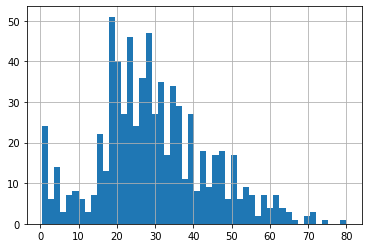

In [6]:
df['Age'].hist(bins=50)
## notice the two ends of this 

#### advantages
- easy to implement 
- captures imp of missing values 

#### disadvantages
- distorts the original distribution of the feature 
- if missingness is not important, it may mask the predictive power of the variable by distorting it's original distribution. 
- hard to decide which arbitrary val to use

## how to handle categorical null values -> using house price prediction

In [54]:
import pandas as pd 
import numpy as np

In [55]:
df = pd.read_csv('houseprice.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [56]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [57]:
df.isnull().sum().sort_values(ascending=True)

SalePrice        0
BsmtQual        37
GarageType      81
FireplaceQu    690
dtype: int64

## Technique 1 -> most frequent category
- when the number of null values isn't too large [like in the case of BsmtQual and Garage Type] 

In [58]:
bq = df['BsmtQual'].value_counts().index[0]

<AxesSubplot: >

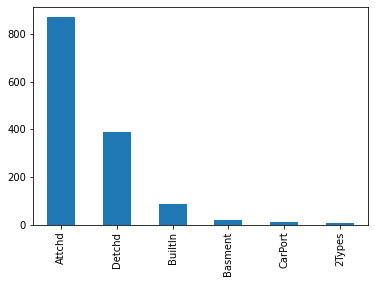

In [59]:
df['GarageType'].value_counts().sort_values(ascending=False).plot.bar()

<AxesSubplot: >

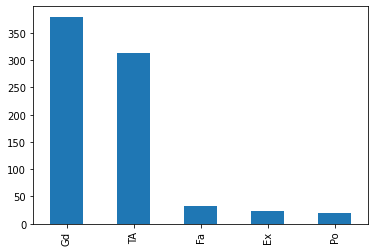

In [60]:
df['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()

In [61]:
def impute_mostfrequent(df,variable):
    most_freq = df[variable].value_counts().index[0]
    df[variable].fillna(most_freq)

In [62]:
impute_mostfrequent(df,'FireplaceQu')

In [63]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [68]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

## Technique 2 -> adding feature to capture NaN value

In [70]:
df = pd.read_csv('houseprice.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head(5)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [71]:
def impute_addedfeature(df,variable):
    df[variable+'addedfeature'] = np.where(df[variable].isnull(),1,0)
    df[variable] = df[variable].fillna(df[variable].value_counts().index[0],inplace=True)

In [78]:
impute_addedfeature(df,'GarageType')

In [80]:
df['BsmtQualaddedfeature'].value_counts()

0    1423
1      37
Name: BsmtQualaddedfeature, dtype: int64

## Technique 3 -> suppose you have multiple categories, replace NaN with an entirely new category

In [81]:
df = pd.read_csv('houseprice.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,NaN,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [95]:
def impute_newcat(df,variable):
    df[variable+'newcat'] = np.where(df[variable].isnull(),'missing',df[variable])

In [91]:
impute_newcat(df,'BsmtQual')

In [94]:
df

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewcat
0,Gd,NaN,Attchd,208500,Gd
1,Gd,TA,Attchd,181500,Gd
2,Gd,TA,Attchd,223500,Gd
3,TA,Gd,Detchd,140000,TA
4,Gd,TA,Attchd,250000,Gd
...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,Gd
1456,Gd,TA,Attchd,210000,Gd
1457,TA,Gd,Attchd,266500,TA
1458,TA,NaN,Attchd,142125,TA
